In [1]:
import textdistance
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math
import copy
from itertools import combinations
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mutual_info_score
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.cluster import KMeans

In [2]:
amazon_small = pd.read_csv('amazon_small.csv')
google_small = pd.read_csv('google_small.csv')

In [3]:
"""List out all possible combinations of two data sets"""
def combination_table(amazon_small, google_small):
    ss = pd.DataFrame()
    amazon = []
    google = []
    amazon_name = []
    google_name = []
    amazon_des = []
    google_des = []
    for i in range(len(amazon_small)):
        for j in range(len(google_small)):
            amazon.append(amazon_small['idAmazon'][i])
            google.append(google_small['idGoogleBase'][j])
            amazon_name.append(amazon_small['title'][i])
            google_name.append(google_small['name'][j])
            amazon_des.append(amazon_small['description'][i])
            google_des.append(google_small['description'][j])
    ss['id_google'] = google
    ss['id_amazon'] = amazon
    ss['amazon_name'] = amazon_name
    ss['amazon_description'] = amazon_des
    ss['google_name'] = google_name
    ss['google_description'] = google_des
    return ss
ss = combination_table(amazon_small, google_small)
ss

,id_google,id_amazon,amazon_name,amazon_description,google_name,google_description
0,http://www.google.com/base/feeds/snippets/1329...,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,encore software 10599 - encore registry mechan...,encore software 10599 : pc tools registry mech...
1,http://www.google.com/base/feeds/snippets/1693...,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,adobe indesign cs3 for mac upgrade from pagemaker,system requirements powerpc g4 or g5 or intel ...
2,http://www.google.com/base/feeds/snippets/4998...,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,encore software 10568 - encore hoyle puzzle & ...,encore software 10568 : with old classics and ...
3,http://www.google.com/base/feeds/snippets/1695...,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,school zone interactive multiplication & divis...,multiplication & division introduces mutliplic...
4,http://www.google.com/base/feeds/snippets/1574...,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,apple software m9953z/a remote desktop 2.2 10 ...,the 10-client version allows one administrator...
5,http://www.google.com/base/feeds/snippets/1738...,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,ahead software 70009 - nero nero v.7.0 ultra e...,ahead software 70009 : nero 7 ultra edition en...
6,http://www.google.com/base/feeds/snippets/6070...,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,power production power production storyboard a...,power production storyboard artist software fo...
7,http://www.google.com/base/feeds/snippets/1828...,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,sims 2 pets for mac,system requirements: requires the full version...
8,http://www.google.com/base/feeds/snippets/1377...,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,pc-cillin internet security 2007 3-user (win m...,trusted by millions to protect their identity ...
9,http://www.google.com/base/feeds/snippets/1758...,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,emedia music corp emedia blues guitar legends,emedia`s blues guitar legends is the ultimate ...


In [4]:
"""replace NaN cells with empty strings for text comparison"""
ss["amazon_description"].replace(np.nan,"",inplace = True)
ss["google_description"].replace(np.nan,"", inplace = True)

In [6]:
"""determine the similarity score for each pair"""
def similarity_score(ss):
    name_score = [textdistance.jaccard(ss["amazon_name"][i].split(), ss["google_name"][i].split()) for i in range(len(ss))]
    des_score = [textdistance.jaccard(ss["amazon_description"][i].split(), ss["google_description"][i].split()) for i in range(len(ss))]
    ss['name_score'] = name_score
    ss["des_score"] = des_score
    ss['final_score'] = (ss['name_score']+ss["des_score"])/2
    return ss
ss = similarity_score(ss)


Wall time: 9.95 s


,id_google,id_amazon,amazon_name,amazon_description,google_name,google_description,name_score,des_score,final_score
0,http://www.google.com/base/feeds/snippets/1329...,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,encore software 10599 - encore registry mechan...,encore software 10599 : pc tools registry mech...,0.000000,0.066667,0.033333
1,http://www.google.com/base/feeds/snippets/1693...,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,adobe indesign cs3 for mac upgrade from pagemaker,system requirements powerpc g4 or g5 or intel ...,0.000000,0.026667,0.013333
2,http://www.google.com/base/feeds/snippets/4998...,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,encore software 10568 - encore hoyle puzzle & ...,encore software 10568 : with old classics and ...,0.000000,0.066667,0.033333
3,http://www.google.com/base/feeds/snippets/1695...,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,school zone interactive multiplication & divis...,multiplication & division introduces mutliplic...,0.000000,0.045455,0.022727
4,http://www.google.com/base/feeds/snippets/1574...,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,apple software m9953z/a remote desktop 2.2 10 ...,the 10-client version allows one administrator...,0.000000,0.069444,0.034722
5,http://www.google.com/base/feeds/snippets/1738...,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,ahead software 70009 - nero nero v.7.0 ultra e...,ahead software 70009 : nero 7 ultra edition en...,0.000000,0.123288,0.061644
6,http://www.google.com/base/feeds/snippets/6070...,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,power production power production storyboard a...,power production storyboard artist software fo...,0.000000,0.121212,0.060606
7,http://www.google.com/base/feeds/snippets/1828...,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,sims 2 pets for mac,system requirements: requires the full version...,0.000000,0.076923,0.038462
8,http://www.google.com/base/feeds/snippets/1377...,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,pc-cillin internet security 2007 3-user (win m...,trusted by millions to protect their identity ...,0.000000,0.044118,0.022059
9,http://www.google.com/base/feeds/snippets/1758...,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,emedia music corp emedia blues guitar legends,emedia`s blues guitar legends is the ultimate ...,0.000000,0.068493,0.034247


In [8]:
"""Determine the matches"""
ama_id = []
goo_id = []
threshold = 0.2
for i in range(len(ss)):
    if ss["final_score"][i] > threshold:
        ama_id.append(ss["id_amazon"][i])
        goo_id.append(ss["id_google"][i])
d = {'idAmazon': ama_id, 'idGoogle': goo_id}
match = pd.DataFrame(data = d)
match

,idAmazon,idGoogle
0,b0002itt84,http://www.google.com/base/feeds/snippets/5505...
1,b000pgvk5s,http://www.google.com/base/feeds/snippets/1872...
2,b0001wn0m2,http://www.google.com/base/feeds/snippets/1009...
3,b0001wn0m2,http://www.google.com/base/feeds/snippets/1778...
4,b000ov0gao,http://www.google.com/base/feeds/snippets/1837...
5,b0001y7poo,http://www.google.com/base/feeds/snippets/4468...
6,b000nvkyse,http://www.google.com/base/feeds/snippets/1492...
7,b000h13a2w,http://www.google.com/base/feeds/snippets/1714...
8,b000h13a2w,http://www.google.com/base/feeds/snippets/9946...
9,b000h13a2w,http://www.google.com/base/feeds/snippets/1338...


In [9]:
truth = pd.read_csv('amazon_google_truth_small.csv')


In [11]:

t = len(truth)
tp = 0
fn = 0
fp = 0
for i in range(len(match)):
    matchpair = 0
    for j in range(len(truth)):
        
        if match["idAmazon"][i] == truth["idAmazon"][j] and match['idGoogle'][i] == truth['idGoogleBase'][j]:
            tp += 1
            matchpair = 1
    if not matchpair:
            fp += 1
fn = t - tp
print(tp)
print(fp)
print(fn)

97
92
33
Wall time: 1.68 s


In [12]:
precision = tp/(fp+tp)
print(precision)

0.5132275132275133


In [13]:
recall = tp/(tp+fn)
print(recall)

0.7461538461538462


We choose to compare the similarity on the ‘name’ and ‘description’ attribute, since they are the most significant feature to describe the item/product and the ‘manufacturer’ attribute has too many missing data that just not usable, and the ‘price’ attribute may lead to many false positive result since it is very likely that there are  different item that have the same price.

The similarity algorithms we employed was token based Jaccard algorithms, because the ‘name’ and ‘description’ features are basically a collection of words that describes the items, so we decide to use words to construct the token sets

And the final score was determined by averaging the 2 similarity score from ‘name’ and ‘description’, we think that they are equally weighted as the word set produce from them are all important description of the items.

For the threshold score, we plot a performance vs threshold score graph to visualise for which score can produce both a relatively high recall and precision.



In [14]:
amazon = pd.read_csv('amazon.csv')
google = pd.read_csv('google.csv')
ground_truth = pd.read_csv("amazon_google_truth.csv.")

for i in range(len(google)):
    if 'gbp' in google["price"][i]:
        google["price"][i] = google["price"][i][:-3]
        
google["price"] = google["price"].astype(float)

block_section = google["price"].sort_values()
lists = []
blist= []
for i in block_section:
    lists.append(i)
for i in range(1,11):
    blist.append(lists[len(lists) // 10 * i])
blist

[14.86, 18.97, 24.95, 29.99, 46.99, 80.97, 129.0, 274.97, 799.0, 218313.0]

In [15]:
#datablocking 

block_section = google["price"].sort_values()
lst = [i for i in block_section]
blist = [lst[len(lst)// 6 * i] for i in range(1, 7)]
blist
edgelist = [0]
edgelist = edgelist + blist
edgelist.append(1000000)
edgelist

[0, 17.97, 26.14, 46.99, 106.29, 363.63, 376765.44, 1000000]

In [16]:
#datablocking 2
google.sort_values(by='price',ascending = True, inplace = True)
amazon.sort_values(by= 'price', ascending = True, inplace = True)

In [17]:
#datablocking 3


word_list = []
for name in google['name']:
    for word in name.split():
        if word not in word_list:
            word_list.append(word)
for name in amazon['title']:
    for word in name.split():
        if word not in word_list:
            word_list.append(word)
len(word_list)

6238

In [18]:
#datablocking 4
column_a= ['idAmazon','title','description']
column_g= ['idGoogleBase','name','description']

In [19]:
"""impute median"""
yeast = pd.read_csv('all_yeast.csv')
for col in yeast.columns:
    if col == 'Class':
        break
    med = yeast[col].median()
    yeast[col].replace(np.nan, med, inplace = True)

yeast.describe()

,Sample,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,742.500000,0.497628,0.499643,0.506167,0.260432,0.506739,0.007500,0.504199,0.276712
std,428.538213,0.131472,0.121954,0.199840,0.150817,0.091580,0.075683,0.153488,0.152315
min,1.000000,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,371.750000,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,742.500000,0.480000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,1113.250000,0.562500,0.570000,0.550000,0.300000,0.500000,0.000000,0.530000,0.290000
max,1484.000000,1.000000,1.000000,7.501819,3.000728,3.500849,0.830000,6.001456,4.501092


In [20]:
"""impute mean"""
yeast1 = pd.read_csv('all_yeast.csv')
for col in yeast1.columns:
    if col == 'Class':
        break
    med = yeast1[col].mean()
    yeast1[col].replace(np.nan, med, inplace = True)

yeast1.describe()


,Sample,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,742.500000,0.499349,0.499876,0.505848,0.264379,0.506921,0.007500,0.503816,0.279816
std,428.538213,0.131357,0.121945,0.199837,0.150286,0.091573,0.075683,0.153481,0.151736
min,1.000000,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,371.750000,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,742.500000,0.499349,0.490000,0.510000,0.230000,0.500000,0.000000,0.510000,0.220000
75%,1113.250000,0.562500,0.570000,0.550000,0.300000,0.500000,0.000000,0.530000,0.290000
max,1484.000000,1.000000,1.000000,7.501819,3.000728,3.500849,0.830000,6.001456,4.501092


Imputing median

As we can see from the describe method for each attribute, all the feature has very small standard deviation, and the 75% interquartile range is far below the mean, which implies that there are some very extreme outliner that skew the data, thus it is more appropriate to impute medians since the means are skew to a unacceptable value.

In [21]:

data = yeast.loc[:,'mcg':'nuc']


In [22]:
"""Standardisation"""
scaler = preprocessing.StandardScaler().fit(data)
std=scaler.transform(data)
pd.DataFrame(std).describe()

,0,1,2,3,4,5,6,7
count,1.484000e+03,1.484000e+03,1.484000e+03,1.484000e+03,1.484000e+03,1.484000e+03,1.484000e+03,1.484000e+03
mean,5.850367e-16,-1.911469e-16,2.817827e-16,1.802990e-17,3.727738e-16,4.263399e-16,-1.979175e-16,-4.642139e-16
std,1.000337e+00,1.000337e+00,1.000337e+00,1.000337e+00,1.000337e+00,1.000337e+00,1.000337e+00,1.000337e+00
min,-2.949354e+00,-3.032012e+00,-1.482523e+00,-1.727390e+00,-7.361222e-02,-9.913140e-02,-3.286049e+00,-1.817324e+00
25%,-6.667373e-01,-6.532740e-01,-2.310980e-01,-5.998152e-01,-7.361222e-02,-9.913140e-02,-1.577143e-01,-3.724614e-01
50%,-1.341268e-01,-7.909596e-02,1.918687e-02,-2.681755e-01,-7.361222e-02,-9.913140e-02,3.780662e-02,-3.724614e-01
75%,4.935928e-01,5.771075e-01,2.194148e-01,2.624480e-01,-7.361222e-02,-9.913140e-02,1.681539e-01,8.726755e-02
max,3.822409e+00,4.104201e+00,3.501812e+01,1.817582e+01,3.270504e+01,1.087141e+01,3.582762e+01,2.774385e+01


In [57]:
"""mean centering"""
data1 = yeast.loc[:,'mcg':'nuc']

for cols in data1.columns:
    mean_val = data1[cols].mean()
    for j in range(len(data1)):
        data1[cols][j] = data1[cols][j] - round(mean_val, 5)
data1.describe()

####compare the effect

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1.484000e+03,1.484000e+03,1.484000e+03,1484.000000
mean,-0.000002,0.000003,-0.000003,0.000002,-8.833848e-07,2.790988e-17,-9.059798e-07,0.000002
std,0.131472,0.121954,0.199840,0.150817,9.157975e-02,7.568267e-02,1.534880e-01,0.152315
min,-0.387630,-0.369640,-0.296170,-0.260430,-6.740000e-03,-7.500000e-03,-5.042000e-01,-0.276710
25%,-0.087630,-0.079640,-0.046170,-0.090430,-6.740000e-03,-7.500000e-03,-2.420000e-02,-0.056710
50%,-0.017630,-0.009640,0.003830,-0.040430,-6.740000e-03,-7.500000e-03,5.800000e-03,-0.056710
75%,0.064870,0.070360,0.043830,0.039570,-6.740000e-03,-7.500000e-03,2.580000e-02,0.013290
max,0.502370,0.500360,6.995649,2.740298,2.994109e+00,8.225000e-01,5.497256e+00,4.224382


The standardisation method scales the features to a normal distribution with mean at 0 with standard deviation of 1, this makes the data better for later engineering since there is no more data scale problem. Whereas the mean centring method just move the data distribution to where the mean is 0, it didn’t change the shape distribution, the problem of outliner still exist

In [24]:
"""Update the yeast dataframe"""
for col in data1.columns:
    yeast[col] = data1[col]
yeast

,Sample,mcg,gvh,alm,mit,erl,pox,vac,nuc,Class
0,1,0.08237,0.11036,-0.03617,-0.13043,-0.00674,-0.0075,-0.0242,-0.05671,non-CYT
1,2,-0.06763,0.17036,-0.02617,0.00957,-0.00674,-0.0075,0.0258,-0.05671,non-CYT
2,3,0.14237,0.12036,-0.01617,-0.11043,-0.00674,-0.0075,0.0258,-0.05671,non-CYT
3,4,0.08237,-0.05964,0.06383,-0.13043,-0.00674,-0.0075,0.0358,-0.05671,non-CYT
4,5,-0.07763,-0.05964,-0.02617,0.27957,-0.00674,-0.0075,-0.0242,-0.05671,non-CYT
5,6,0.01237,-0.09964,0.05383,-0.09043,-0.00674,0.4925,-0.0142,-0.05671,CYT
6,7,0.00237,0.04036,-0.02617,0.38957,-0.00674,-0.0075,0.0258,-0.05671,non-CYT
7,8,-0.01763,-0.04964,0.08383,-0.06043,-0.00674,-0.0075,0.0758,0.06329,non-CYT
8,9,0.05237,0.00036,0.15383,0.09957,-0.00674,-0.0075,-0.0142,-0.05671,non-CYT
9,10,-0.09763,-0.10964,0.09383,-0.11043,-0.00674,-0.0075,0.0758,0.02329,CYT


In [25]:
"""Knn for k = 5"""
new_data = yeast.loc[:,'mcg':'nuc']
dic = {"CYT": 1, "non-CYT":0 }
new_data2 = yeast["Class"].replace(dic) # Replace the 'Class' attribute to boolean values
new_data2 = new_data2.ravel()
X_train, X_test, y_train, y_test = train_test_split(new_data, new_data2, train_size=0.66, test_size=0.34, random_state=1)
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
"""Accuracy score for k = 5"""
y_pred=knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.691089108910891


In [27]:
pd.crosstab(y_pred, y_test)

col_0,0,1
row_0,,
0,287,88
1,68,62


In [28]:
"""knn for k = 10"""
X_train1, X_test1, y_train1, y_test1 = train_test_split(new_data, new_data2, train_size=0.66, test_size=0.34, random_state=1)
knn1 = neighbors.KNeighborsClassifier(n_neighbors=10)
knn1.fit(X_train1, y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [29]:
y_pred1=knn1.predict(X_test1)
print(accuracy_score(y_test1, y_pred1))

0.7049504950495049


In [30]:
"""Decision tree"""
X_train, X_test, y_train, y_test = train_test_split(new_data, new_data2, train_size=0.66, test_size =0.34, random_state=3)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.6792079207920793

Classification algorithms

The knn with 10 features is the best amonst the methods, follow by knn with 5 features, and decision tree is the worse. The reason why the k 10 is better tan knn 5 is that the larger the k value is , the more data is in the cluster to do the analysis.

In [32]:
"""interaction term pairs feature generation by multiplication of two features, including all possible
combinations"""
train = pd.DataFrame()
for i in range(len(X_train.columns)-1):
    if i == 7:
        break
    col1 = X_train.columns[i]
    for j in range(i+1, len(X_train.columns)):
        col2 = X_train.columns[j]
        col_name = (col1+'&'+col2)
        train[col_name] = X_train[col1]*X_train[col2]


In [33]:
"""K mean label feature generation by multiplication of two features, including all possible
combinations"""
for i in range(len(X_train.columns)-1):
    if i == 7:
        break
    col1 = X_train.columns[i]
    for j in range(i+1, len(X_train.columns)):
        col2 = X_train.columns[j]
        col_name = (col1+'/'+col2)
        train[col_name] = X_train[col1]/X_train[col2]


In [34]:
"""add the new features to the training set"""
for col in train.columns:
    X_train[col] = train.loc[:,col]
X_train

C:\Users\Andy Ping\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,mcg,gvh,alm,mit,erl,pox,vac,nuc,mcg&gvh,mcg&alm,...,mit/erl,mit/pox,mit/vac,mit/nuc,erl/pox,erl/vac,erl/nuc,pox/vac,pox/nuc,vac/nuc
633,-0.09763,0.24036,-0.01617,-0.10043,-0.00674,-0.0075,0.0058,-0.05671,-0.023466,0.001579,...,14.900593,13.390667,-17.315517,1.770940,0.898667,-1.162069,0.118850,-1.293103,0.132252,-0.102275
746,-0.21763,-0.03964,-0.24617,-0.08043,-0.00674,-0.0075,-0.1142,-0.05671,0.008627,0.053574,...,11.933234,10.724000,0.704291,1.418268,0.898667,0.059019,0.118850,0.065674,0.132252,2.013754
1381,-0.27763,0.03036,-0.14617,-0.04043,-0.00674,-0.0075,0.0358,0.03329,-0.008429,0.040581,...,5.998516,5.390667,-1.129330,-1.214479,0.898667,-0.188268,-0.202463,-0.209497,-0.225293,1.075398
574,-0.15763,0.04036,0.03383,-0.13043,-0.00674,-0.0075,0.0158,-0.05671,-0.006362,-0.005333,...,19.351632,17.390667,-8.255063,2.299947,0.898667,-0.426582,0.118850,-0.474684,0.132252,-0.278610
482,0.20237,0.23036,-0.13617,0.10957,-0.00674,-0.0075,-0.0242,0.03329,0.046618,-0.027557,...,-16.256677,-14.609333,-4.527686,3.291379,0.898667,0.278512,-0.202463,0.309917,-0.225293,-0.726945
1372,-0.04763,-0.10964,-0.04617,0.02957,-0.00674,-0.0075,0.0058,-0.05671,0.005222,0.002199,...,-4.387240,-3.942667,5.098276,-0.521425,0.898667,-1.162069,0.118850,-1.293103,0.132252,-0.102275
1064,0.01237,-0.00964,-0.18617,-0.04043,-0.00674,-0.0075,0.0058,-0.05671,-0.000119,-0.002303,...,5.998516,5.390667,-6.970690,0.712925,0.898667,-1.162069,0.118850,-1.293103,0.132252,-0.102275
711,0.02237,0.14036,0.00383,-0.10043,-0.00674,-0.0075,0.0658,-0.05671,0.003140,0.000086,...,14.900593,13.390667,-1.526292,1.770940,0.898667,-0.102432,0.118850,-0.113982,0.132252,-1.160289
1386,0.30237,0.32036,-0.10617,0.04957,-0.00674,-0.0075,0.0658,-0.02671,0.096867,-0.032103,...,-7.354599,-6.609333,0.753343,-1.855859,0.898667,-0.102432,0.252340,-0.113982,0.280794,-2.463497
387,0.08237,-0.04964,-0.02617,-0.02043,-0.00674,-0.0075,0.0158,0.09329,-0.004089,-0.002156,...,3.031157,2.724000,-1.293038,-0.218995,0.898667,-0.426582,-0.072248,-0.474684,-0.080394,0.169364


In [36]:
"""calculate mutual information with each attribute and the label"""
mi_dict = {}
for col in X_train.columns:
    mi = mutual_info_score(X_train[col], y_train)
    mi_dict[col] = mi
mi_df = pd.DataFrame(list(mi_dict.values()),columns = ['MI'], index = mi_dict.keys())
mi_df

,MI
mcg,0.060129
gvh,0.071062
alm,0.094062
mit,0.054400
erl,0.000038
pox,0.002547
vac,0.025956
nuc,0.048649
mcg&gvh,0.454656
mcg&alm,0.424918


In [37]:
"""sort from highest"""
mi_df.sort_values(by = 'MI',ascending = False, inplace = True) # sort the MI scores from highest to lowest

In [38]:
"""Create a new training set with attributes with top 8 highest mutual information scores"""
count = 0
features = []
for index in mi_df.index:
    if count == 8:
        break
    features.append(index)
    count+= 1
pair_training = pd.DataFrame()
for feature in features:
    pair_training[feature] = X_train[feature]
pair_training

,mcg/gvh,mcg&gvh,gvh/mit,gvh&mit,mcg/alm,mcg&alm,mcg&mit,mcg/mit
633,-0.406182,-0.023466,-2.393309,-0.024139,6.037724,0.001579,0.009805,0.972120
746,5.490161,0.008627,0.492851,0.003188,0.884064,0.053574,0.017504,2.705831
1381,-9.144598,-0.008429,-0.750928,-0.001227,1.899364,0.040581,0.011225,6.866930
574,-3.905600,-0.006362,-0.309438,-0.005264,-4.659474,-0.005333,0.020560,1.208541
482,0.878495,0.046618,2.102400,0.025241,-1.486157,-0.027557,0.022174,1.846947
1372,0.434422,0.005222,-3.707812,-0.003242,1.031622,0.002199,-0.001408,-1.610754
1064,-1.283195,-0.000119,0.238437,0.000390,-0.066445,-0.002303,-0.000500,-0.305961
711,0.159376,0.003140,-1.397590,-0.014096,5.840731,0.000086,-0.002247,-0.222742
1386,0.943844,0.096867,6.462780,0.015880,-2.847980,-0.032103,0.014988,6.099859
387,-1.659347,-0.004089,2.429760,0.001014,-3.147497,-0.002156,-0.001683,-4.031816


[0.7089108910891089, 0.7128712871287128, 0.7128712871287128, 0.7128712871287128, 0.7128712871287128]


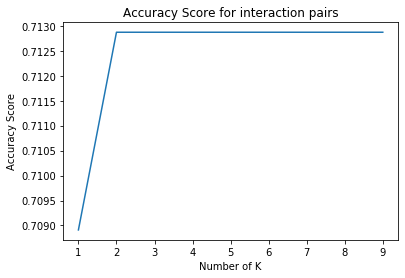

In [39]:
"""plot the accuracy with k in a range from 1 to 10"""
acuracy = []
ks = range(1,10,1)
for k in ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(pair_training, y_train)
    y_pred=knn.predict(X_test)
    acuracy.append(accuracy_score(y_test, y_pred))
print(acuracy[0:5])
plt.plot(ks, acuracy)
plt.xlabel('Number of K')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for interaction pairs')
plt.show()

In [40]:
X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(new_data, new_data2, train_size=0.66, test_size=0.34, random_state=1)

In [41]:
"""Prediction by k-mean labels"""
no_k = range(1,10)
label_df = pd.DataFrame()
for k in no_k:
    kmeanModel = KMeans(n_clusters = k).fit(X_train_cluster)
    labels = kmeanModel.labels_
    label_df[str(k)] = labels
label_df

    

,1,2,3,4,5,6,7,8,9
0,0,0,0,0,2,0,1,1,5
1,0,0,0,0,0,4,0,0,0
2,0,0,0,0,2,4,0,7,2
3,0,0,0,0,2,0,1,1,5
4,0,0,0,0,0,3,6,3,3
5,0,0,0,0,2,3,6,3,3
6,0,0,0,0,0,4,0,0,0
7,0,0,0,0,2,0,1,1,5
8,0,0,0,0,2,3,6,3,3
9,0,0,0,0,0,3,6,3,3


In [46]:
"""add the new features to the training set"""
X_train_cluster = X_train_cluster.reset_index(drop = True)
for col in label_df.columns:
    col_name = 'label k = ' + col
    X_train_cluster[col_name] = label_df.loc[:,col]
X_train_cluster

,mcg,gvh,alm,mit,erl,pox,vac,nuc,label k = 1,label k = 2,label k = 3,label k = 4,label k = 5,label k = 6,label k = 7,label k = 8,label k = 9
0,0.12237,-0.07964,-0.03617,-0.10043,-0.00674,-0.0075,0.0158,-0.05671,0,0,0,0,2,0,1,1,5
1,0.14237,0.26036,0.00383,-0.08043,-0.00674,-0.0075,-0.0442,-0.05671,0,0,0,0,0,4,0,0,0
2,0.10237,0.07036,0.01383,-0.12043,-0.00674,-0.0075,-0.0442,0.20329,0,0,0,0,2,4,0,7,2
3,0.03237,-0.04964,0.02383,-0.08043,-0.00674,-0.0075,-0.0842,-0.05671,0,0,0,0,2,0,1,1,5
4,0.03237,0.02036,0.10383,0.08957,-0.00674,-0.0075,-0.0042,-0.05671,0,0,0,0,0,3,6,3,3
5,-0.08763,0.02036,0.02383,0.14957,-0.00674,-0.0075,-0.1142,0.05329,0,0,0,0,2,3,6,3,3
6,0.27237,0.23036,0.00383,0.00957,-0.00674,-0.0075,-0.1642,-0.05671,0,0,0,0,0,4,0,0,0
7,-0.04763,0.06036,-0.01617,-0.09043,-0.00674,-0.0075,0.0158,-0.05671,0,0,0,0,2,0,1,1,5
8,0.00237,-0.13964,0.02383,0.14957,-0.00674,-0.0075,0.0058,0.08329,0,0,0,0,2,3,6,3,3
9,0.04237,0.01036,0.03383,0.25957,-0.00674,-0.0075,-0.0342,-0.02671,0,0,0,0,0,3,6,3,3


In [52]:
"""calculate the mutual information score for each attribute and the label"""
label_dict = {}
for col in X_train_cluster.columns:
    mi = mutual_info_score(X_train_cluster[col], y_train_cluster)
    label_dict[col] = mi
mi_cluster_df = pd.DataFrame(list(label_dict.values()),columns = ['MI'], index = label_dict.keys())
mi_cluster_df

,MI
mcg,6.321976e-02
gvh,7.081596e-02
alm,8.898398e-02
mit,4.394531e-02
erl,4.033834e-04
pox,2.370854e-03
vac,2.712642e-02
nuc,4.971402e-02
label k = 1,-2.775558e-16
label k = 2,1.165901e-03


In [54]:
mi_cluster_df.sort_values(by = 'MI',ascending = False, inplace = True) # sort the MI scores from highest to lowest

In [55]:
"""Create a new training set with attributes with top 8 highest mutual information scores"""
count1 = 0
features1 = []
for index in mi_cluster_df.index:
    if count1 == 8:
        break
    features1.append(index)
    count1+= 1
cluster_training = pd.DataFrame()
for feature in features1:
    cluster_training[feature] = X_train_cluster[feature]
cluster_training

,alm,gvh,mcg,nuc,mit,vac,label k = 9,label k = 8
0,-0.03617,-0.07964,0.12237,-0.05671,-0.10043,0.0158,5,1
1,0.00383,0.26036,0.14237,-0.05671,-0.08043,-0.0442,0,0
2,0.01383,0.07036,0.10237,0.20329,-0.12043,-0.0442,2,7
3,0.02383,-0.04964,0.03237,-0.05671,-0.08043,-0.0842,5,1
4,0.10383,0.02036,0.03237,-0.05671,0.08957,-0.0042,3,3
5,0.02383,0.02036,-0.08763,0.05329,0.14957,-0.1142,3,3
6,0.00383,0.23036,0.27237,-0.05671,0.00957,-0.1642,0,0
7,-0.01617,0.06036,-0.04763,-0.05671,-0.09043,0.0158,5,1
8,0.02383,-0.13964,0.00237,0.08329,0.14957,0.0058,3,3
9,0.03383,0.01036,0.04237,-0.02671,0.25957,-0.0342,3,3


[0.6138613861386139, 0.6554455445544555, 0.691089108910891, 0.6811881188118812, 0.700990099009901]


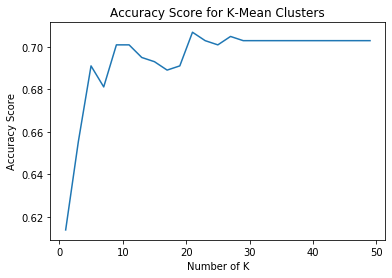

In [61]:
"""plot the accuracy with k in a range from 1 to 10"""
acuracy1 = []
ks1 = range(1,50,2)
for k in ks1:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(cluster_training, y_train_cluster)
    y_pred=knn.predict(X_test_cluster)
    acuracy1.append(accuracy_score(y_test_cluster, y_pred))
print(acuracy1[0:5])
plt.plot(ks1, acuracy1)
plt.xlabel('Number of K')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for K-Mean Clusters')
plt.show()

Discussion of feature engineering

In order to have an overall view of how data is correlated, we select a range of k for knn and number of clusters, and then plot the graph with their corresponding accuracy to see if there is a significant trend or determine the best parameter value that can improve accuracy. We also select the features (both original and new generated) with highest score of mutual information, which data points are more closely linked together to improve accuracy.

There is a little improvement for feature selection and generation interaction pair, because we pick the features that have the highest mutual information., for knn with interaction pair, the accuracy hits the upper limit accuracy at k = 2(0.71287), this implies that the data point are clustered very closely so all the data are included when k = 2

For clustering label, it is possible to improve the accuracy at some number of k, however the accuracy will converge at a certain amount of k. The accuracy peaked at around k = 22, and then converges to local optimum when k >= 30 (around 0.7), because there are only a certain amount of clusters and data points, there is a point where adding new cluster centre would not change anything.

